# Projet CO2 à finir maison 

## Avancées faites sur site

In [2]:
import pandas as pd
import seaborn as sn


# Importation et nettoyage du jeu de données issues de RTE

La première étape est d'importer le jeu de données sur la production d'électricité française. Les données sont issue de RTE pour la période s'étalant de Janvier 2021 à janvier 2022. Ces données ont été vérifiée et consolidées plusieurs fois par les organismes compétents et sont donc fiables. 

In [3]:
data = pd.read_csv("../Data/eco2mix-national-cons-def.csv", sep=";", header=0)
data

,Périmètre,Nature,Date,Heure,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
0,France,Données consolidées,2021-08-07,18:45,2021-08-07T18:45:00+02:00,NaN,39350,39550,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,France,Données consolidées,2021-08-07,21:45,2021-08-07T21:45:00+02:00,NaN,38000,38200,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données consolidées,2021-08-07,22:15,2021-08-07T22:15:00+02:00,NaN,38900,39100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,France,Données consolidées,2021-08-07,23:45,2021-08-07T23:45:00+02:00,NaN,40300,40400,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données consolidées,2021-08-08,01:30,2021-08-08T01:30:00+02:00,34655.0,35800,35200,60.0,8.0,...,0.0,276.0,240.0,58.0,5072.0,856.0,638.0,481.0,296.0,332.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,France,Données consolidées,2021-01-10,15:45,2021-01-10T15:45:00+01:00,NaN,68850,69100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35036,France,Données consolidées,2021-01-11,01:30,2021-01-11T01:30:00+01:00,73385.0,72500,73600,97.0,1528.0,...,4.0,2915.0,4947.0,94.0,3520.0,2280.0,260.0,502.0,286.0,330.0
35037,France,Données consolidées,2021-01-11,04:45,2021-01-11T04:45:00+01:00,NaN,68350,70000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,France,Données consolidées,2021-01-11,08:00,2021-01-11T08:00:00+01:00,86759.0,85800,88100,120.0,2289.0,...,1.0,3118.0,5570.0,92.0,5236.0,5889.0,2664.0,493.0,278.0,323.0


Une fois ce jeu de données importé, il est possible de visualiser les données contenues. On remarque d'ailleurs qu'il existe plusieurs lignes de données où des données sont manquantes car l'index temporel utilisé est trop rafiné. De plus, certaines colonnes ne seront pas utilisées pour la suite de l'étude. Par exemple, les colonnes périmètre et nature des données ne seront plus utiles par la suite, de la même manière que les colonnes Date et Heure font doublons avec la colonne "Date et Heure" qui regroupe les même données. On peut donc supprimer ces colonnes afin d'alléger notre tableau. 

In [4]:
data.drop(columns=["Périmètre","Nature","Date","Heure"], inplace=True)

Par la suite, on utilise la colonne "Date et Heure" pour indexer notre tableau afin de s'assurer d'avoir des données liées à une temporalité. De cette manière on peut trier et analyser nos données de manière plus aisées. De plus, dans le cadre de ce Notebook j'utilise une librairie Python appelée "Pandas" qui a été spécialement conçue pour travailler avec de telles données temporelle, et pour l'utiliser à son plein potentiel, il faut désigner l'index comme étant une date et une heure. 

In [5]:
data.set_index("Date et Heure", inplace=True)
data.index = pd.to_datetime(data.index, utc=True)
data.index = data.index.tz_convert("Europe/Paris")


Une fois la dataframe (= le tableau de données) bien reformée, on va pouvoir supprimer les lignes inutiles. Par lignes inutiles j'entends ici les lignes comprenant des "NaN" comme dans le premier tableau. En effet, ces lignes faisant état d'un manque de données, il est inutile de les conserver pour la suite de l'étude. De plus, afin de s'assurer qu'il ne manque pas d'information après suppression de ces lignes, on peut vérifier combien de lignes il nous reste après suppression. 

In [6]:
data.dropna(inplace=True)
data.shape

(17520, 32)

On remarque que seulement la moitié des lignes a été conservé. Cela renforce l'idée première selon laquelle l'index temporel était trop raffiné pour les données. En effet, en immaginant que la base de donnée était mise à jour toutes les 15 minutes, mais que les données réelles n'étaient communiquées que toutes les 30 minutes, il est évident qu'une ligne sur deux n'allait pas contenir de données. 

Sachant cela, on peut maintenant trier notre dataframe selon la date afin de s'assurer du bon ordre chronologique.

In [7]:
data.sort_index(inplace=True) 

## Constitution des différentes bases (Production globale, ENR, Consommation, Exportation)

Afin de s'assurer une bonne étude, il faut maintenant séparer nos données en différents jeux de données plus petits. Je vais donc séparer les données de la base principale en plusieurs sous bases de données qui vont contenir chacune des données liées à un champ spécifique de la production d'énergie française, à savoir :
* Une base de donneés comprenant les données de production d'énergie totale en France, peu importe la source de production
* Une base comprenant les données concernant les énergies renouvelables (Solaire, éolien, Hydraulique, Bioénergies)
* Une base comprenant les données concernant les énergies dites "Vertes", ou "Sustainable" (Nucléaire, gaz + toutes celles de la base précédente) (*Note : cette base a été constituée selon la nouvelle taxonomie verte Européenne qui inclue le nucléaire et le gaz sous certaines conditions strictes depuis Juillet 2022)
* Une base comprenant les sources d'énergie fossile (Fioul, Charbon, Gaz)
* Une base comprenant les exportations d'énergie aux pays voisins de l'UE

In [8]:
data_prod = data[['Fioul (MW)','Charbon (MW)','Gaz (MW)', 'Nucléaire (MW)','Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)']]
data_enr = data[['Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)']]
data_vert = data[['Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)','Nucléaire (MW)', 'Gaz (MW)']]
data_fossile = data[['Charbon (MW)','Gaz (MW)', 'Fioul (MW)']]
data_export = data[['Ech. comm. Allemagne-Belgique (MW)', 'Ech. comm. Angleterre (MW)', 'Ech. comm. Espagne (MW)', 'Ech. comm. Italie (MW)',
                    'Ech. comm. Suisse (MW)','Ech. physiques (MW)']]

In [9]:
data_export

,Ech. comm. Allemagne-Belgique (MW),Ech. comm. Angleterre (MW),Ech. comm. Espagne (MW),Ech. comm. Italie (MW),Ech. comm. Suisse (MW),Ech. physiques (MW)
Date et Heure,,,,,,
2021-01-01 00:00:00+01:00,3022.0,-2000.0,1682.0,502.0,-1960.0,1429.0
2021-01-01 00:30:00+01:00,3172.0,-2000.0,1682.0,502.0,-1960.0,881.0
2021-01-01 01:00:00+01:00,2294.0,-2000.0,2463.0,611.0,-1804.0,1200.0
2021-01-01 01:30:00+01:00,2544.0,-2000.0,2463.0,611.0,-1804.0,1825.0
2021-01-01 02:00:00+01:00,3206.0,-2000.0,3200.0,834.0,-2002.0,2097.0
...,...,...,...,...,...,...
2021-12-31 21:30:00+01:00,1822.0,629.0,-3496.0,-2934.0,-2720.0,-6508.0
2021-12-31 22:00:00+01:00,3719.0,232.0,-2139.0,-2868.0,-3163.0,-6117.0
2021-12-31 22:30:00+01:00,3719.0,232.0,-2139.0,-2868.0,-3163.0,-4254.0


# Observation des dataframes obtenues

Afin d'observer les tendances générales des données obtenues, on effectue un graphique reprenant la valeur moyenne hebdomadaire de chaque donnée. On pourra ainsi apprecier de manière globale les variation de production. 

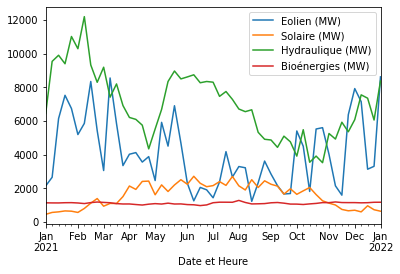

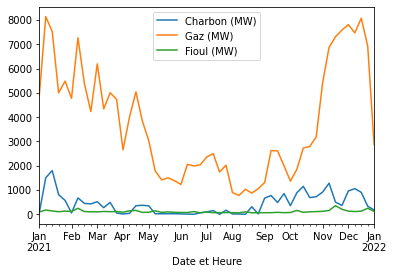

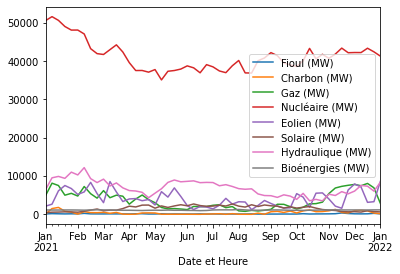

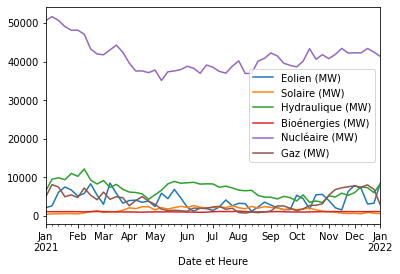

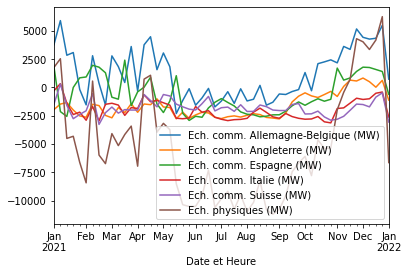

In [10]:
dataframes = [data_enr, data_fossile, data_prod, data_vert, data_export]
for df in dataframes :
    df.resample("W").mean().plot()

## Analyses des graphiques

### La production d'énergie globale 

Afin d'analyser la production d'énergie globale ainsi que les différences entre les sources d'énergie électrique française on utilise un graphique en aires, qui permet de mieux apprécier la part globale de chaque source d'énergie dans le total de production.

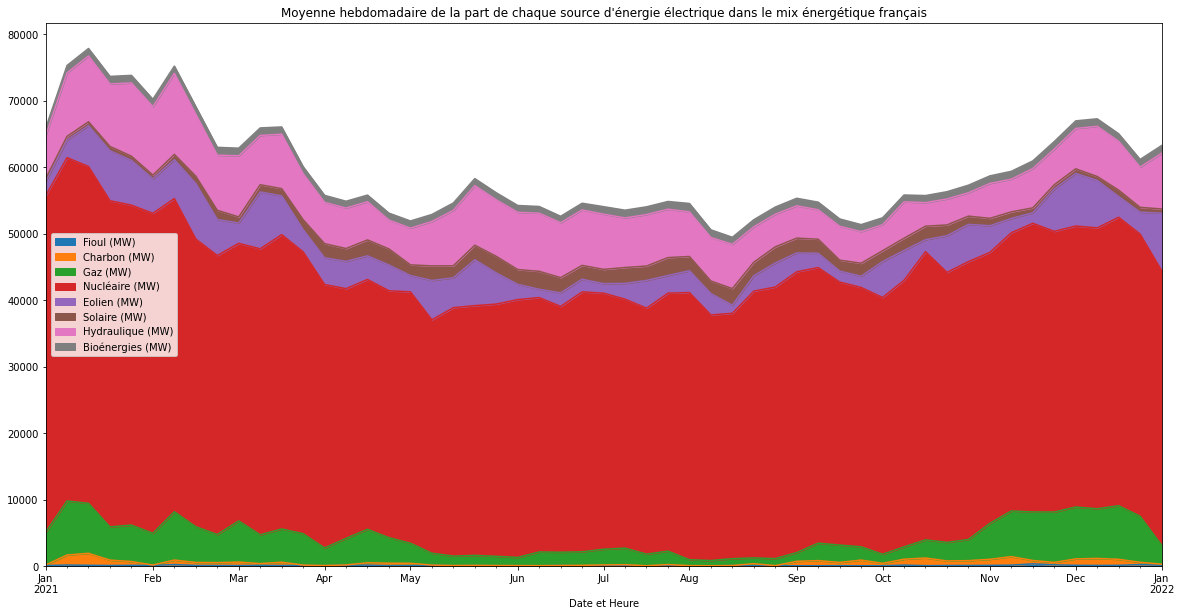

In [11]:
fig_prod_area = data_prod.resample('W').mean().plot.area(figsize=(20,10), title="Moyenne hebdomadaire de la part de chaque source d'énergie électrique"
+" dans le mix énergétique français")

La première chose qui saute rapidement aux yeux est la part importante du nucléaire dans le mix énergétique de production d'électricité. On remarque également une belle part réservée à la production hydraulique et également à l'éolien. Ces différentes part semblent relativement constantes tout au long de l'année 2021. 

On remarquera également la présence d'une belle part de production gazière, surtout durant les mois d'hiver et de début printemps. 

Pour le reste, on retiendra que la part du solaire augmente à partir de mi printemps jusqu'à mi automne. Rien d'étonnant puisque l'ensoleillement diminue en  dehors de ces périodes. 

Pour finir on remarquera une part négligeable dédiée au Charbon et au Fioul. 

En rentrant un peu plus en profondeur dans l'analyse on remarque ce qui semble être une corrélation entre la production gazière et la production solaire. Il serait tentant d'affirmer dès maintenant que les centrales à gaz servent en majorité à compenser le manque de solaire durant l'hiver, et également en cas de pic de demande sur le réseau afin de compenser le caractère non pilotable des centrales photovoltaïques. Cependant il est encore trop tôt pour affirmer une telle chose (ou même l'infirmer). En l'état nous ne pouvons considérer qu'il n'existe qu'une simple corrélation apparente entre ces deux sources d'énergie. 

Etudions maintenant l'évolution directe des valeurs moyennes au cours de l'année de ces sources d'énergie.

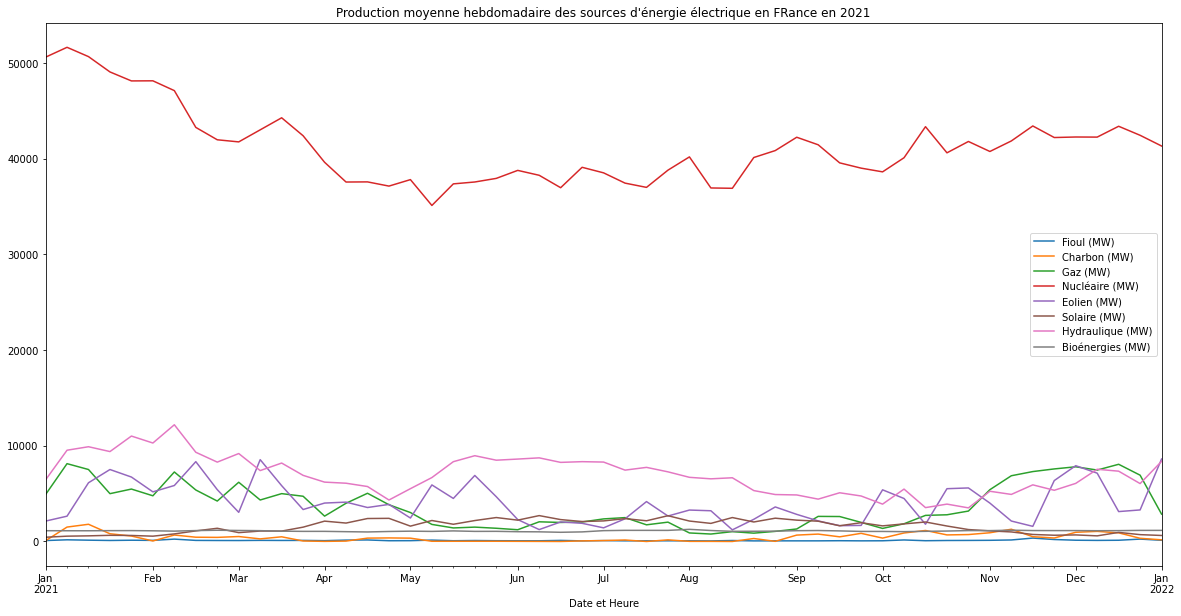

In [12]:
fig_prod = data_prod.resample('W').mean().plot(figsize = (20,10), title="Production moyenne hebdomadaire des sources d'énergie électrique en FRance en 2021")

Grâce à ce graphique nous pouvons avoir une idée plus précise de la production d'énergie par source. On remarque la même tendance que précédemment, à savoir que les sources d'électricité les plus importantes sont le nucléaire (de loin la première), l'hydraulique en second et enfin l'éolien. 

On remarque également que la production éolienne oscille au gré des semaines, et qu'elle passe par un "plateaux" minimum aux alentours de l'été notamment. 

Notons aussi que la production liée au gaz subit une forte augmentation durant les mois d'hiver, passant même devant la production hydraulique durant Novembre et Décembre 2021 ! 

Concernant les autres modes de production l'échelle n'est malheureusement pas adaptée. Qu'à cela ne tienne, nous allons les analyser séparément. Nous pouvons néanmoins retenir que la production absolue de ces méthodes est négligeable face aux quatre autres modes de production principaux. 

<AxesSubplot:title={'center':"Production d'électricité dûe aux modes de production les moins prédominants en France en 2021"}, xlabel='Date et Heure'>

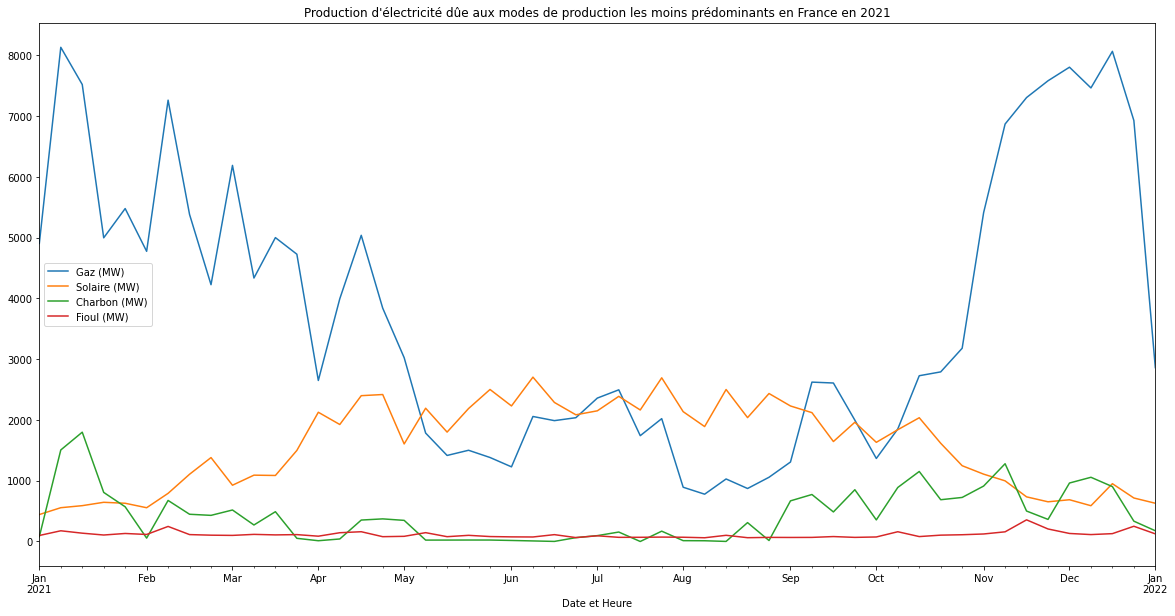

In [13]:
data_prod_faible = data_prod[['Gaz (MW)', 'Solaire (MW)', 'Charbon (MW)', 'Fioul (MW)']]
data_prod_faible.resample('W').mean().plot(figsize=(20,10), title="Production d'électricité dûe aux modes de production les moins prédominants en France en 2021")

Ce graphique est bien plus utile afin d'étudier les différentes variations de ces modes de production d'électricité. En effet on remarque assez bien sur ces graphique que la production du Fioul est très négligeable de manière générale, et que celle du charbon l'est tout autant en dehors des périodes hivernales. 

Ajoutons à cela que nous pouvons également mieux observer la corrélation qui semble exister entre production gazière et production solaire, comme nous en avions émis l'hypothèse plus haut. On remarque bien ici une augmentation de la production solaire durant les mois printaniers et éstivaux, ainsi qu'une diminution dans le même temps de la production gazière. Nous pouvons donc apporter un peu plus de crédit à notre hypothèse de base. 

Cependant, on remarque que les valeurs absolues de production ne se compense pas du tout. En effet, là ou le gaz se situe à une moyenne de 6000 MW produit sur les premiers mois de l'année, le solaire stagne à à peine 500MW, et à l'inverse en été le solaire ne grimpe "que" jusqu'à 3000MW environ alors que le gaz chute à moins de 2000MW en moyenne. Cela représente donc un gap global entre les deux énergies d'environ 1000MW, ce qui reste quand même relativement élevé. 

Plusieurs explications demeurent possibles pour expliquer ces différence. Tout d'abord une possible demande en énergie plus importante en hiver qu'en été : en effet en hiver nous avons tendance à plus chauffer, à plus manger des aliments chauds, à éclairer également plus longtemps compte tenu de la durée réduite de la journée. Tous ces élements peuvent expliquer une production globale plus importante. Peut également s'ajouter à cela que le gaz puisse compenser dans le même temps un manque de production des autres sources d'énergie. 

Il est également important de rappeler que le gaz possède un énorme avantage sur le solaire et l'éolien : il est entièrement pilotable. En cela nous entendons qu'il est possible d'augmenter ou diminuer rapidement la production, là où ce n'est pas possible de le faire avec l'éolien ou le solaire (je n'ai personnellement jamais vu personne commander aux vents ni aux nuages pour qu'il y ait plus de soleil). 

Autre donnée intéressante, les centrales à charbon fonctionne également bien plus durant ces périodes hivernales qu'en été.

Toutes ces données combinées tendent donc vers l'hypothèse que la demande en électricité est bien plus forte en hiver, et bien plus dépendante de sources pilotables à la demande.

Nous pouvons vérifier cela de manière rapide grâce aux données RTE

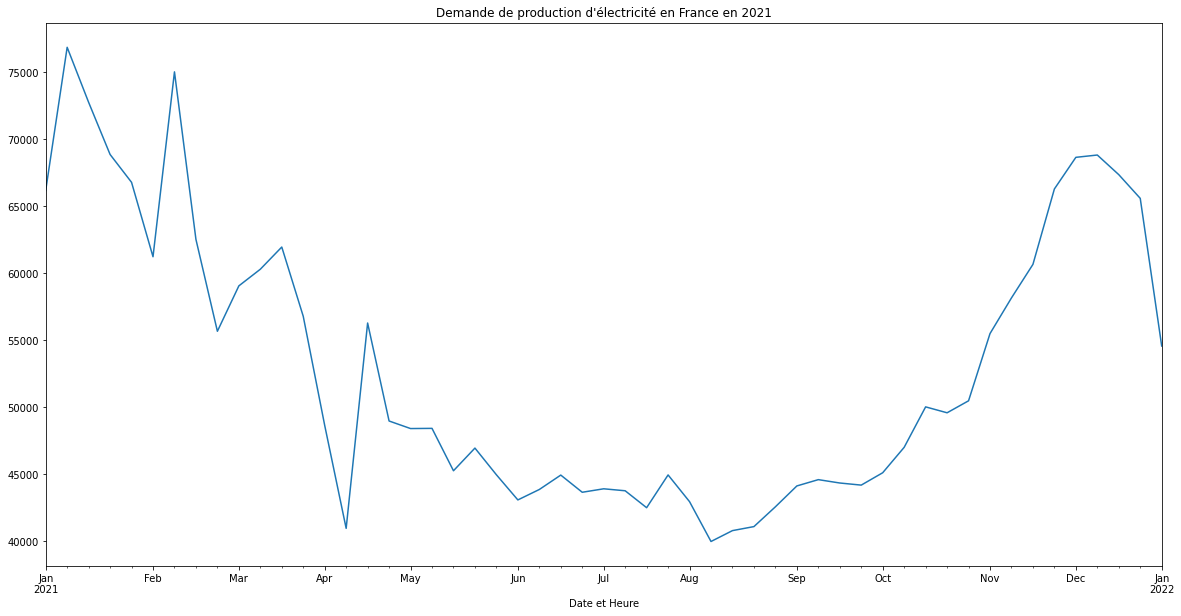

In [14]:
data_demande = data['Prévision J (MW)'].resample('W').mean().plot(figsize=(20,10), title="Demande de production d'électricité en France en 2021")

Notre précédente hypothèse semble donc juste ! En effet on observe une très nette augmentation de la production globale durant les périodes hivernales que lors des périodes estivales. En combinant ces résultats et les résultats précédents nous pouvons en tirer plusieurs choses que je vais rappeler :

* Le nucléaire est la source d'énergie privilégiée en France
* Le solaire et l'éolien semblent être compensés en cas de forte demande par les centrales à gaz et à charbon, spécialement lors des périodes hivernales
* Les centrales à Fioul représentent une part négligeable de la production française globale (mais elle existe)
* Les centrales à charbons ne semblent être utilisées qu'en cas de dernier recours, lorsque les autres modes de production ne peuvent répondre à la demande. 
* Le solaire perd de sa capacité de production durant les périodes hivernales et doit être compensé
* Les sources d'énergies renouvelables (solaire et éolien) ne sont pas pilotables et représentent donc un certain risque en cas de pic de demande et de consommation, et doivent donc être compensées par des sources fossiles pilotables (gaz et charbon en majeure partie)


# Zoom sur les énergies renouvelables (Solaire, éolien et hydraulique en particulier)

Maintenant que nous avons fait un tour d'horizon global des sources d'énergie électrique en France sur l'année 2021, nous pouvons observer plus dans le détail les sources d'énergie renouvelables, à savoir le solaire, l'éolien et l'hydraulique. 


<AxesSubplot:title={'center':"Production d'électricité via les sources renouvelable en moyenne hebdomadaire en France en 2021"}, xlabel='Date et Heure'>

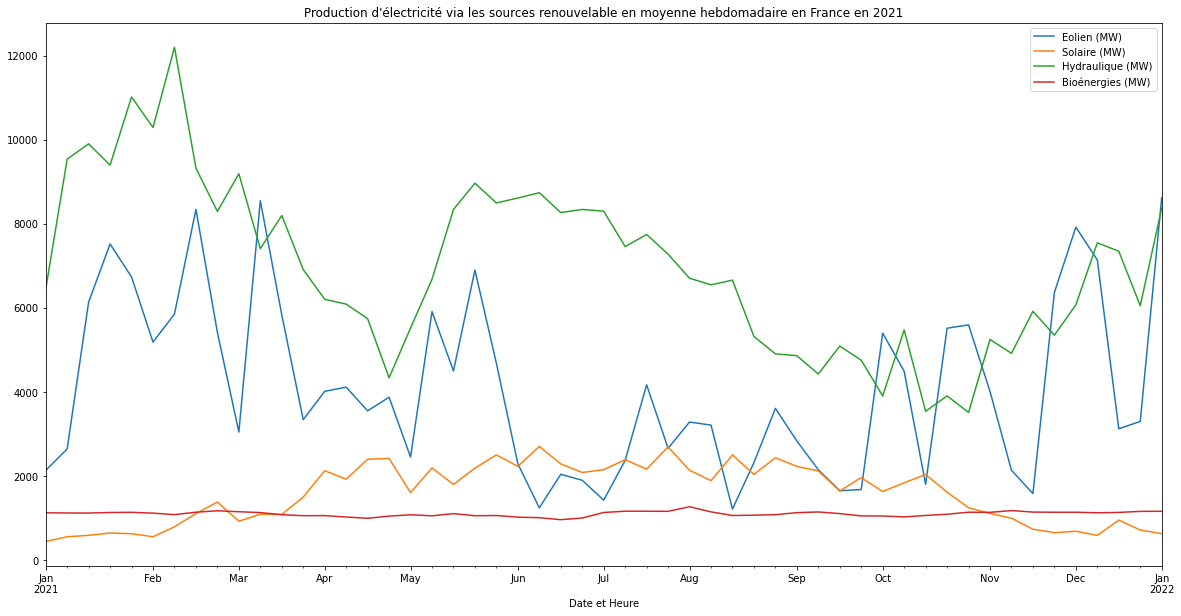

In [15]:
data_enr.resample('W').mean().plot(figsize=(20,10), title="Production d'électricité via les sources renouvelable en moyenne hebdomadaire en France en 2021")

Plusieurs choses intéressantes ressortent de ce graphique. 

Premièrement on observe une grande oscillation dans la production d'énergie éolienne au cours des semaines. Cela souligne d'autant plus la non pilotabilité de cette source d'énergie. En effet, on remarque beaucoup moins ces oscillations sur la production nucléaire par exemple. De plus, on remarque également une chute de production hydraulique à partir de Mars, qui correspond peu ou prou avec la montée de la production solaire. Notons que dans ce cadre la production d'énergie hydraulique via les barrages hydrauélectriques notamment est pilotable. Cette baisse de production est notamment liée à la baisse de la demande globale. La remontée qui suit est dûe aux compensation faites aux réacteurs nucléaires à l'arrêt durant les mois d'été à cause des fortes chaleurs, ainsi qu'à la baisse de régime de l'éolien durant cette même période. Qu'il est pratique d'avoir une source pilotable à la demande pour pallier ces manques de production de certaines sources ! 

Secondement, bien que la production d'énergie photovolaïque soit bien non pilotable, la valeur moyenne de la production hebdomadaire varie peu. En effet, sur cette source d'énergie, c'est plutôt la variation journalière qu'il est interressant d'étudier, afin de voir l'impact de la variation d'ensoleillement et de la nuit sur les produtions. Etudions les variations journalières du mois de juillet par exemple.

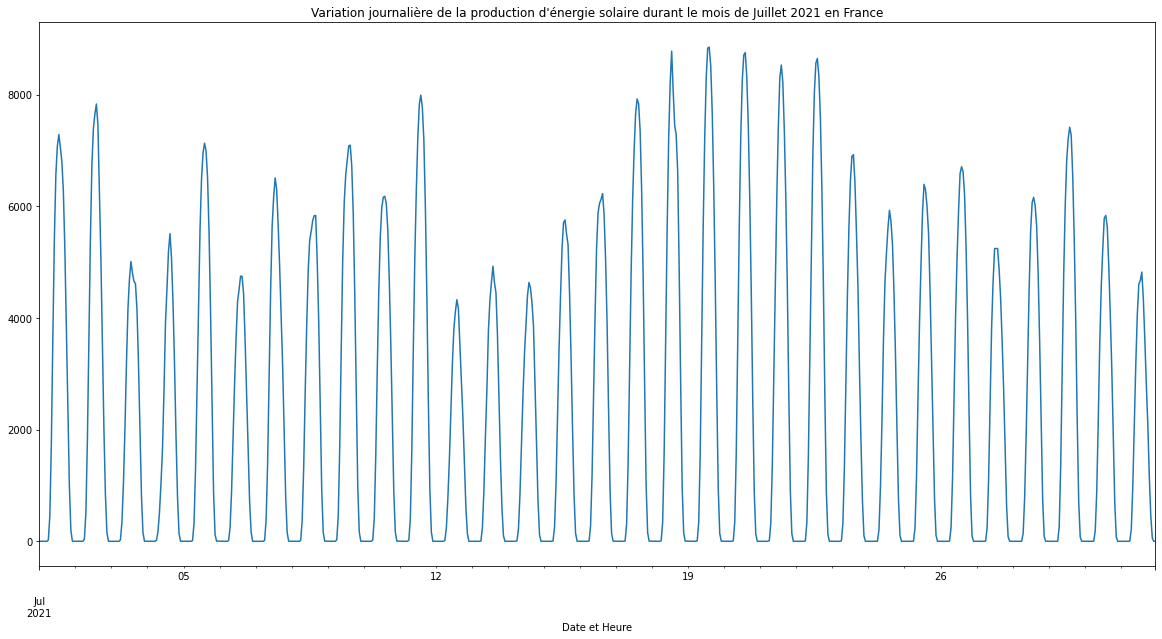

In [16]:
data_juillet_solaire = data_enr['Solaire (MW)'].loc[data_enr.index.month == 7].resample('H').mean().plot(figsize=(20,10), title="Variation journalière de la production d'énergie solaire durant le mois de Juillet 2021 en France")

La différence de production est très notable ! Comme nous pouvions nous y attendre, la nuit les panneaux solaires ne produisent rien ! Il faut donc évidemment compenser cela par une autre source d'énergie pilotable afin de pouvoir continuer à s'éclairer chez soi et d'utiliser l'électricité.